<a href="https://colab.research.google.com/github/arfaiqbal04/ETL-Analysis-and-Visualization-sales/blob/main/Project_2oeson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import csv
import pandas as pd
import numpy as np

In [1]:

from google.colab import files
uploaded = files.upload()


Saving 1707906882174_0837c4782b9108d8.csv to 1707906882174_0837c4782b9108d8.csv


In [23]:




df = pd.read_csv(io.BytesIO(uploaded['1707906882174_0837c4782b9108d8.csv']))
print(df)

      work_year                 job_title                    job_category  \
0          2023      Data DevOps Engineer                Data Engineering   
1          2023            Data Architect  Data Architecture and Modeling   
2          2023            Data Architect  Data Architecture and Modeling   
3          2023            Data Scientist       Data Science and Research   
4          2023            Data Scientist       Data Science and Research   
...         ...                       ...                             ...   
9350       2021           Data Specialist    Data Management and Strategy   
9351       2020            Data Scientist       Data Science and Research   
9352       2021  Principal Data Scientist       Data Science and Research   
9353       2020            Data Scientist       Data Science and Research   
9354       2020     Business Data Analyst                   Data Analysis   

     salary_currency  salary  salary_in_usd employee_residence  \
0        

In [3]:
dff=pd.DataFrame(df)
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


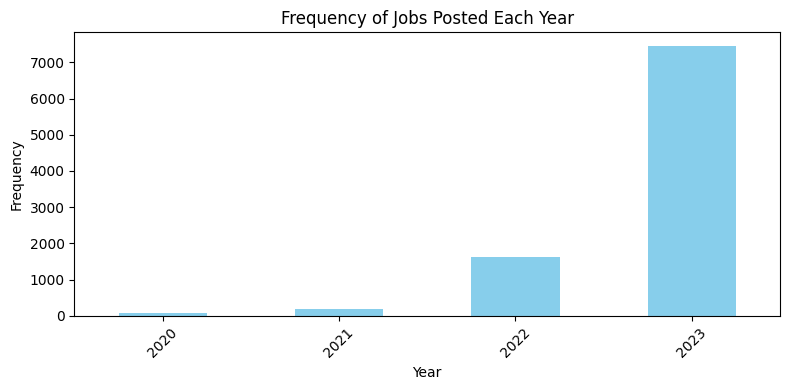

In [20]:
# 1. Frequency of Each Year
year_counts = dff['work_year'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
year_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Jobs Posted Each Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

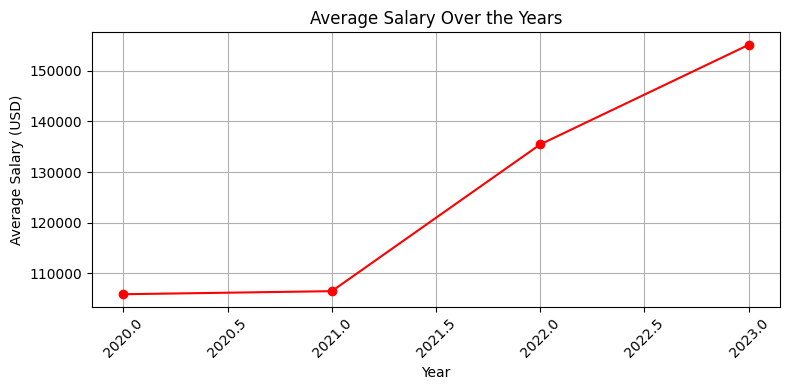

In [19]:
# 2. Average Salaries for Each Year
avg_salary_year = dff.groupby('work_year')['salary_in_usd'].mean()
plt.figure(figsize=(8, 4))
avg_salary_year.plot(kind='line', marker='o', color='red')
plt.title('Average Salary Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

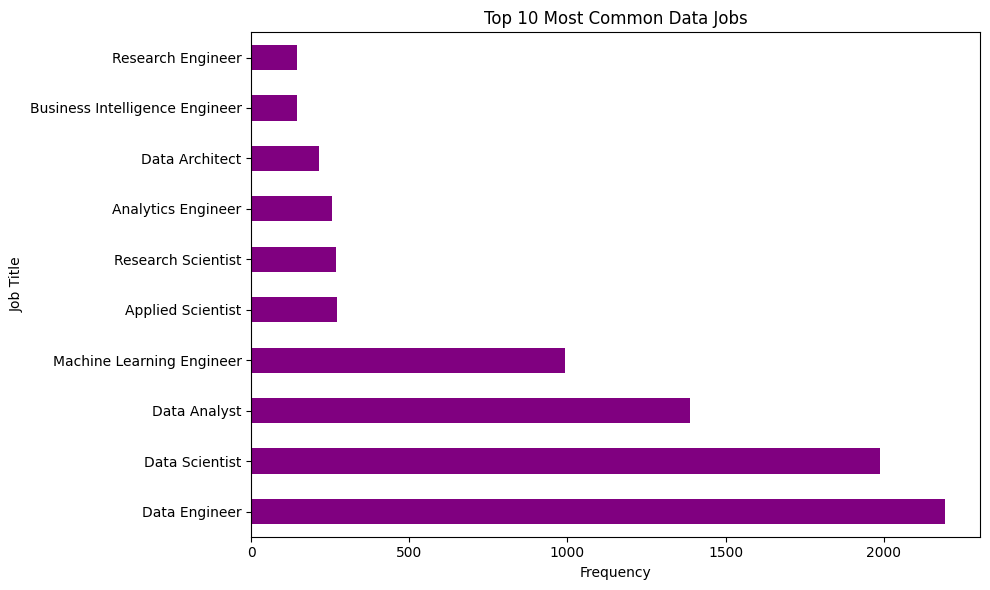

In [18]:
# 3. Frequency of Job Titles
job_title_counts = dff['job_title'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
job_title_counts.plot(kind='barh', color='purple')
plt.title('Top 10 Most Common Data Jobs')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

<ipython-input-17-22c3e6d29004>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="job_title", data=dff, order=dff['job_title'].value_counts().iloc[:10].index, palette="viridis")


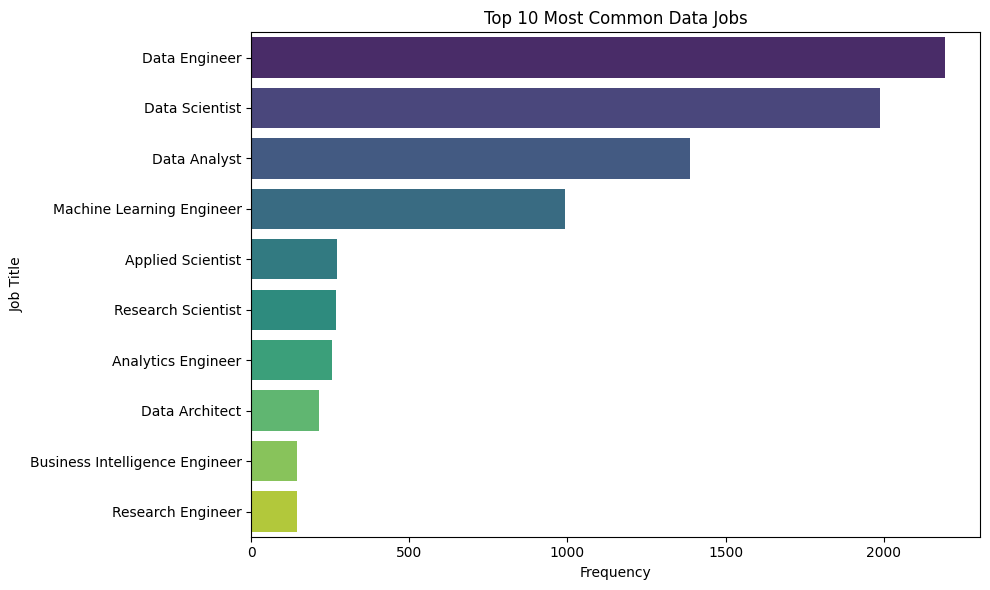

In [17]:
# 4: Top 10 Most Common Data Jobs
plt.figure(figsize=(10, 6))
sns.countplot(y="job_title", data=dff, order=dff['job_title'].value_counts().iloc[:10].index, palette="viridis")
plt.title('Top 10 Most Common Data Jobs')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

In [25]:
#5:6:Visualize Average Salaries by Job Titles and Top Job Titles:
avg_salaries = dff.groupby('job_title')['salary_in_usd'].mean().reset_index()
top_avg_salaries = avg_salaries.nlargest(5, 'salary_in_usd')  # Top 5 job titles with highest salaries

fig = px.bar(avg_salaries, x='job_title', y='salary_in_usd', title='Average Salaries by Job Titles',
             labels={'salary_in_usd': 'Average Salary (USD)', 'job_title': 'Job Title'})
fig.show()

fig2 = px.bar(top_avg_salaries, x='job_title', y='salary_in_usd', title='Top Job Titles with Highest Average Salaries',
              labels={'salary_in_usd': 'Average Salary (USD)', 'job_title': 'Job Title'})
fig2.show()

<ipython-input-34-7ae41bc86dd1>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




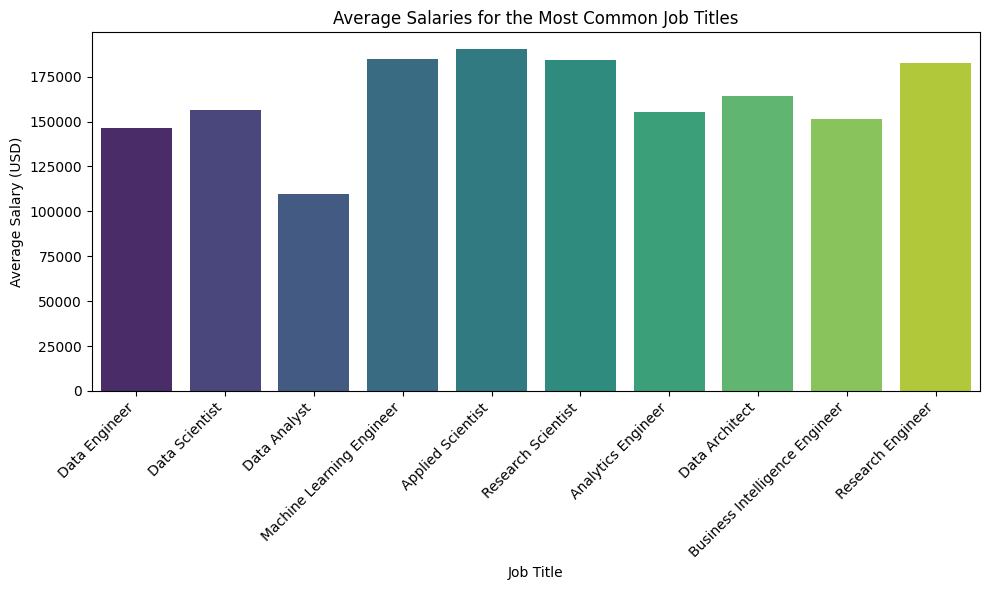

In [34]:
#7Visualize Average Salaries for the most common job titles

plt.figure(figsize=(10, 6))
job_title_counts = dff['job_title'].value_counts().nlargest(10)
avg_salary_by_job_title = dff.groupby('job_title')['salary_in_usd'].mean().loc[job_title_counts.index]
sns.barplot(x=job_title_counts.index, y=avg_salary_by_job_title.values, palette='viridis')
plt.title('Average Salaries for the Most Common Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


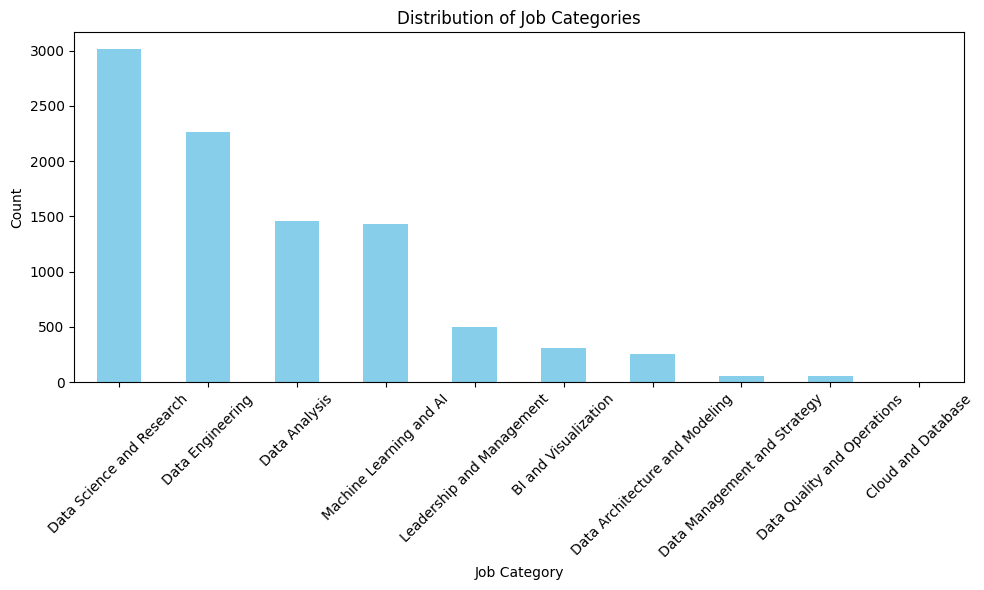

In [36]:
plt.figure(figsize=(10, 6))
job_category_counts = dff['job_category'].value_counts()
job_category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Job Categories')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
avg_salary_by_category = dff.groupby('job_category')['salary_in_usd'].mean().reset_index()

fig = px.bar(avg_salary_by_category, x='job_category', y='salary_in_usd',
             title='Average Salaries by Job Category',
             labels={'salary_in_usd': 'Average Salary (USD)', 'job_category': 'Job Category'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

<ipython-input-40-6064bfeb1958>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




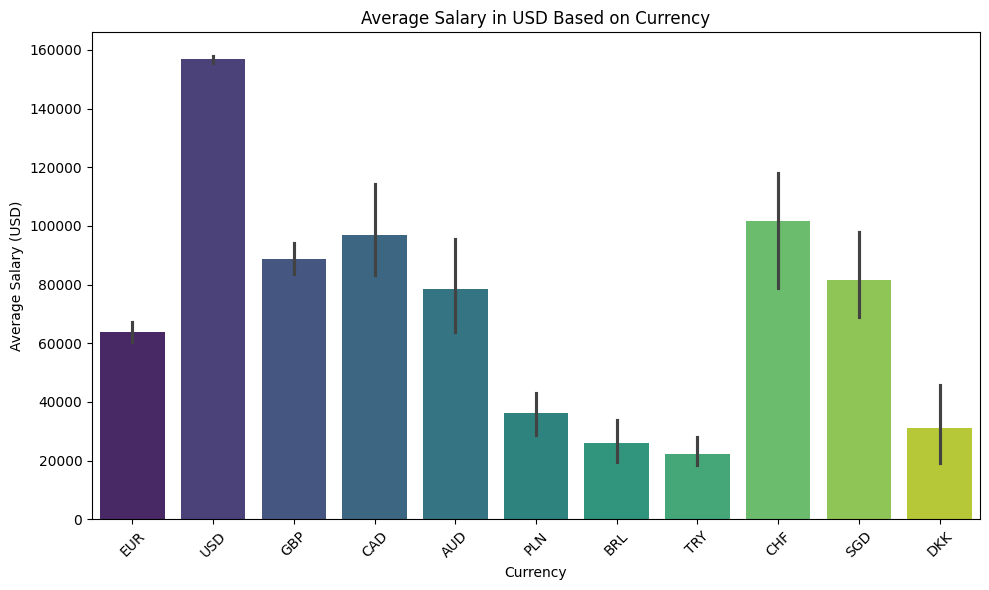

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='salary_currency', y='salary_in_usd', data=dff, palette='viridis', estimator=np.mean)
plt.title('Average Salary in USD Based on Currency')
plt.xlabel('Currency')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

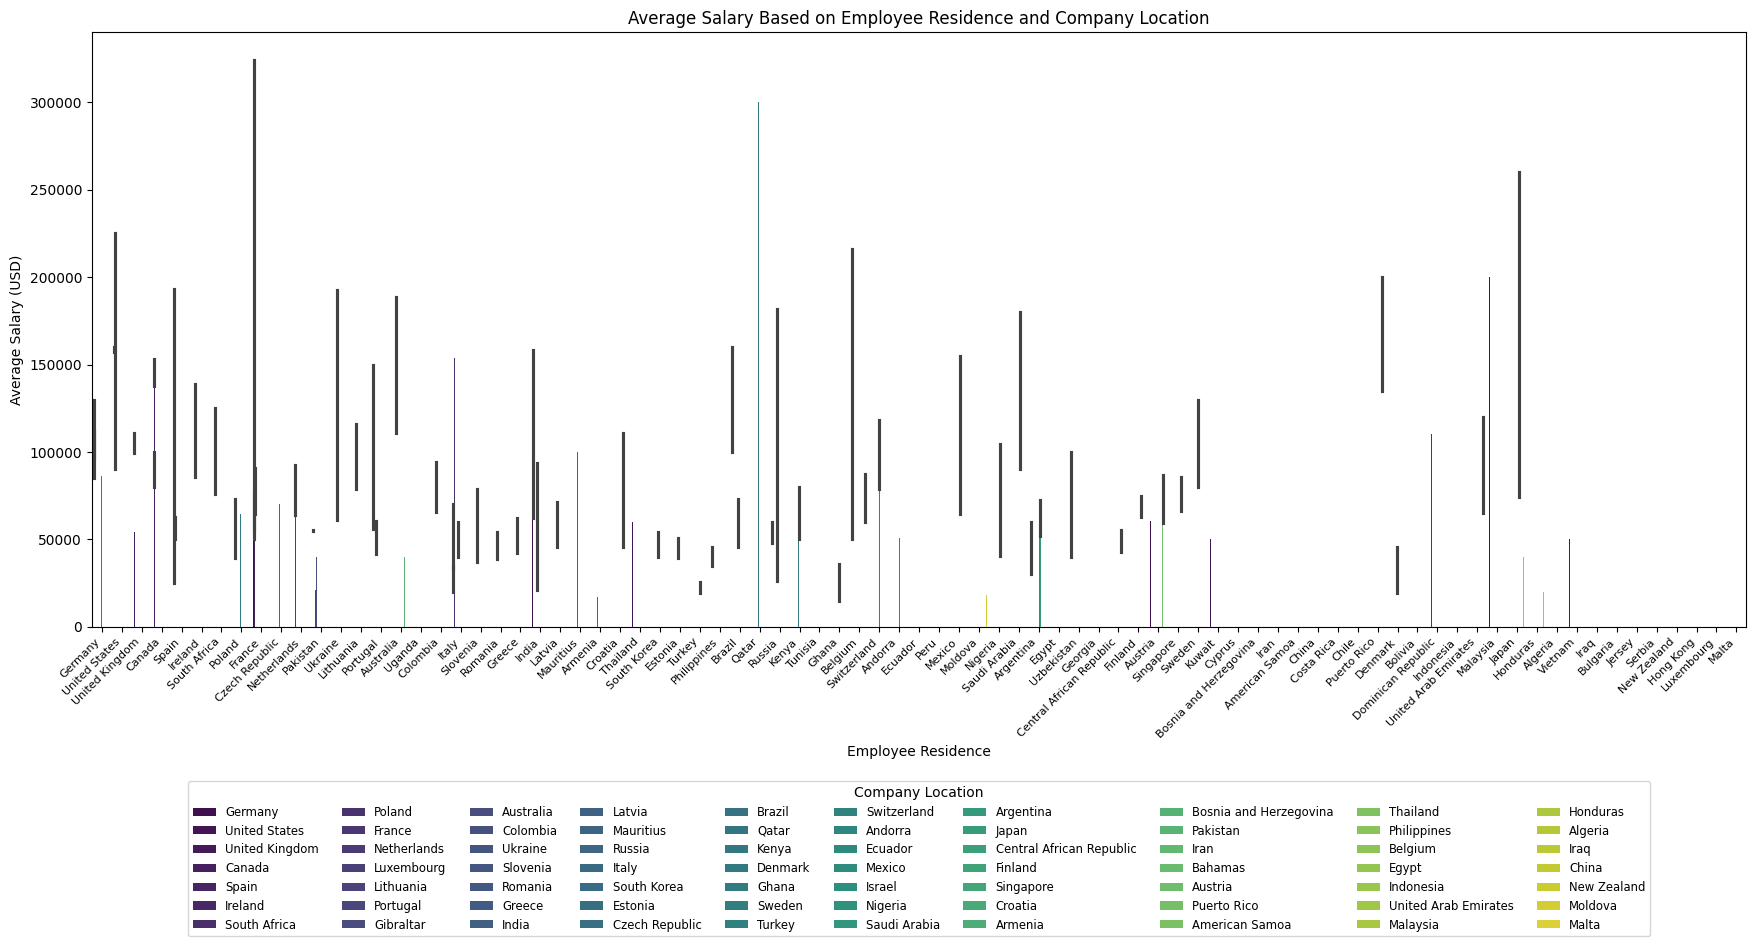

In [52]:
# Filter out rows with NaN values in 'salary_in_usd'
dff_filtered = dff.dropna(subset=['salary_in_usd'])

plt.figure(figsize=(18, 10))  # Increase the figure size to accommodate the large number of countries
sns.barplot(x='employee_residence', y='salary_in_usd', hue='company_location',
            data=dff_filtered, estimator=np.mean, palette='viridis')

plt.title('Average Salary Based on Employee Residence and Company Location')
plt.xlabel('Employee Residence')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Increase the font size and rotate x-axis labels for better readability
plt.legend(title='Company Location', fontsize='small', bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=10)  # Arrange legends horizontally
plt.tight_layout()
plt.show()

<ipython-input-53-243a360c2502>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




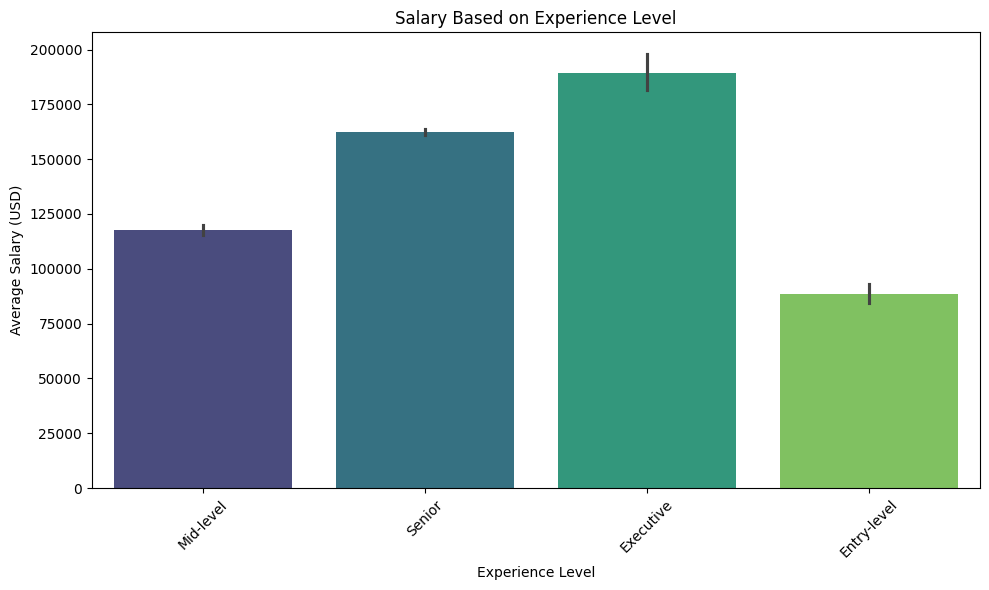

In [53]:
#Visualize salary based on experience level
plt.figure(figsize=(10, 6))
sns.barplot(x='experience_level', y='salary_in_usd', data=dff, estimator=np.mean, palette='viridis')
plt.title('Salary Based on Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-55-8d3ad373b960>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-55-8d3ad373b960>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-55-8d3ad373b960>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




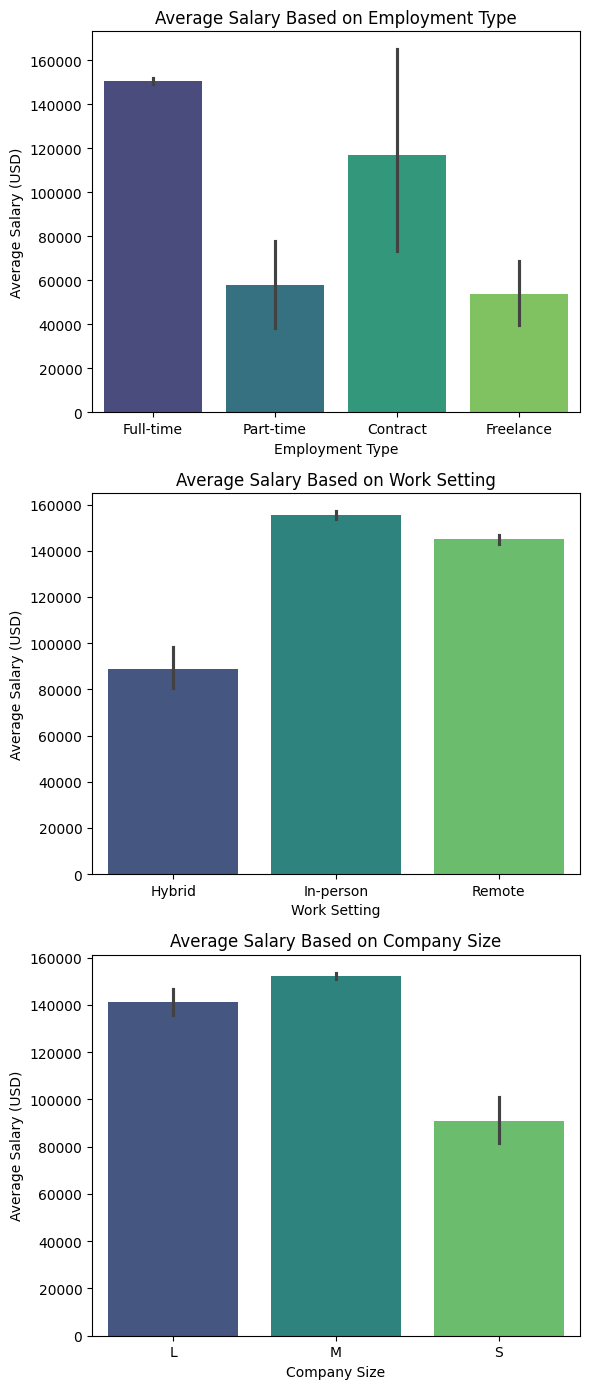

In [55]:
#Visualize average salary based on employment type, work setting and company_size
# Set up the figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(6, 14))

# Visualize average salary based on employment type
sns.barplot(x='employment_type', y='salary_in_usd', data=dff, estimator=np.mean, ax=axes[0], palette='viridis')
axes[0].set_title('Average Salary Based on Employment Type')
axes[0].set_xlabel('Employment Type')
axes[0].set_ylabel('Average Salary (USD)')

# Visualize average salary based on work setting
sns.barplot(x='work_setting', y='salary_in_usd', data=dff, estimator=np.mean, ax=axes[1], palette='viridis')
axes[1].set_title('Average Salary Based on Work Setting')
axes[1].set_xlabel('Work Setting')
axes[1].set_ylabel('Average Salary (USD)')

# Visualize average salary based on company size
sns.barplot(x='company_size', y='salary_in_usd', data=dff, estimator=np.mean, ax=axes[2], palette='viridis')
axes[2].set_title('Average Salary Based on Company Size')
axes[2].set_xlabel('Company Size')
axes[2].set_ylabel('Average Salary (USD)')

# Adjust layout
plt.tight_layout()
plt.show()

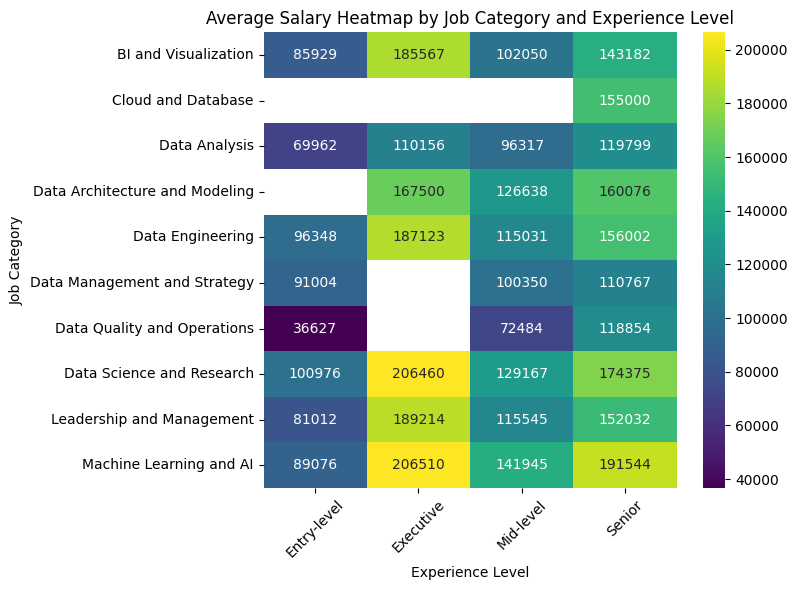

In [58]:
# Calculate the average salary based on job category and experience level
avg_salary_heatmap = dff.groupby(['job_category', 'experience_level'])['salary_in_usd'].mean().unstack()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(avg_salary_heatmap, annot=True, cmap='viridis', fmt='.0f')
plt.title('Average Salary Heatmap by Job Category and Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Job Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()